# Определение перспективного тарифа для телеком компании

Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
•	сообщение: 3 рубля
•	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 1 рубль
•	сообщение: 1 рубль
•	1 Гб интернет-трафика: 150 рублей


## Шаг 1. Открытие файла и изучение общей информации

Откроем и изучим все 5 файлов по очереди.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [4]:
data_calls = pd.read_csv('/datasets/calls.csv', sep=',')
display(data_calls.head())
data_calls.info()


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация о звонках) содержит 5 столбцов и 202606 строк.

Пропущенных значений нет. Тип данных - строка, целое и вещественное число.
Нужно изменить строчный тип данных в столбце с датой на временной. 
Отдельно рассмотрим, что делать с нулевой длительностью звонка.

Столбцы:
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок


In [4]:
data_internet = pd.read_csv('/datasets/internet.csv', sep=',')
display(data_internet.head())
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях) состоит из 4 столбцов и 139 396 строк.
Пропущенных значений нет. Строчный тип данных нужно заменить на временной в столбце с датой.

Столбцы:
•	id — уникальный номер сессии
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
•	session_date — дата интернет-сессии
•	user_id — идентификатор пользователя


In [5]:
data_messages = pd.read_csv('/datasets/messages.csv', sep=',')
display(data_messages.head())
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях) имеет 3 столбца и 123 036 строк. 
Без пропущенных значений. Тип данных в столбце с датой нужно заменить на соответствующий.

Столбцы:
•	id — уникальный номер сообщения
•	message_date — дата сообщения
•	user_id — идентификатор пользователя, отправившего сообщение


In [6]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
display(data_tariffs.head())
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах) содержит 8 столбцов и 2 строки, без пропущенных значений и некорректных типов данных.

Столбцы:
•	tariff_name — название тарифа
•	rub_monthly_fee — ежемесячная абонентская плата в рублях
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [7]:
data_users = pd.read_csv('/datasets/users.csv', sep=',')
display(data_users.head())
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица users (информация о пользователях) состоит из 8 столбцов и 500 строк. 
Пропущенные значения в столбце churn_date логичны, т.к. дата указывается только в случае прекращения использования тарифа. Тип данных нужно изменить в столбце reg_date.

Столбцы:
•	user_id — уникальный идентификатор пользователя
•	first_name — имя пользователя
•	last_name — фамилия пользователя
•	age — возраст пользователя (годы)
•	reg_date — дата подключения тарифа (день, месяц, год)
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
•	city — город проживания пользователя
•	tariff — название тарифного плана




### Вывод

Во всех 5 таблицах нет пропущенных значений, т.е. данные достаточно "чистые". Необходимо только исправить строчный тип данных на временной и округлить значения минут и мегабайтов, а также перевести вещественные числа в целые.

## Шаг 2.  Предобработка данных

В таблице calls изменим строчный тип данных столбца с датой звонка на временной и проверим замену.

In [8]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В таблице calls большое количество звонков длительность которых — 0.0 минут, что составляет около 20% от всех звонков. Это много. Возможно, это звонки, непринятые оппонентом пользователя или система биллинга постоянно их учитывает как состоявшиеся.
Поскольку нам нужно исследовать и количество звонков, и их длительность, такие данные могут исказить результаты. "Мегалайн" всегда округляет вверх значения минут, округлим вверх длительность звонка в минутах. Cтроки с длительностью звонка - 0.00. округлим до 1.


In [9]:
display(data_calls.loc[data_calls.loc[:, 'duration'] == 0.00]['duration'].count() / len(data_calls))
data_calls['duration'] = np.ceil(data_calls['duration']) 
data_calls.loc[data_calls['duration'] == 0, 'duration'] = 1
display(data_calls['duration'].head())


0.19551644316336553

0     1.0
1     1.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

В таблице internet  изменим строчный тип данных столбца session_date на временной. Также удалим пустой столбец unnamed.

In [10]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
data_internet = data_internet.drop('Unnamed: 0',axis=1)
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Поскольку "Мегалайн" всегда округляет вверх значения мегабайтов, округлим вверх объем траффика в МБ в таблице internet, переведем Мб в Гб и переименуем столбец mb_used

In [11]:
data_internet['mb_used'] = np.ceil(data_internet['mb_used']) 
data_internet['mb_used'] = data_internet['mb_used'] / 1024
data_internet = data_internet.rename(columns={"mb_used":"gb_used"})

В таблице messages изменим строчный тип данных столбца message_date на временной


In [12]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Измением тип данных в одном столбце таблицы users на временной тип

In [13]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Переименуем столбцы tariff_name и mb_per_month в файле с данными по тарифами, т.к. это потребуется для слияния и расчета данных.
Мб пересчитаем в Гб.



In [14]:
data_tariffs['mb_per_month_included'] = data_tariffs['mb_per_month_included'] / 1024
data_tariffs = data_tariffs.rename(columns={"tariff_name": "tariff", "mb_per_month_included": "gb_per_month_included"})
display(data_tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


#### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

Создадим в датасетах calls, messages, internet новый столбец month для их последующего группирования по двум параметрам - user_id и month.

In [15]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month



Построим сводную таблицу по количеству и длительности звонков для каждого пользователя по месяцам, сразу соединяя таблицы  calls и users

In [16]:
user_calls = data_calls.merge(data_users, on='user_id', how='inner')
calls_pivot = user_calls.pivot_table(values=['id', 'duration'], 
                                     index=['user_id', 'month'], 
                                     aggfunc=('sum', 'count')).reset_index()
calls_pivot.drop(calls_pivot.columns[[2, 5]], axis=1, inplace=True) 
calls_pivot.columns = ['user_id', 'month', 'duration', 'calls']
display(calls_pivot.head(10))



,user_id,month,duration,calls
0,1000,5,164.0,22
1,1000,6,187.0,43
2,1000,7,346.0,47
3,1000,8,418.0,52
4,1000,9,478.0,58
5,1000,10,363.0,57
6,1000,11,344.0,43
7,1000,12,341.0,46
8,1001,11,444.0,59
9,1001,12,430.0,63


#### Расчет количества отправленных сообщений по месяцам


Построим сводную таблицу по количеству cообщений для каждого пользователя по месяцам

In [17]:
user_msg = data_messages.merge(data_users, on='user_id', how='inner')
msg_pivot = pd.pivot_table(user_msg, index=['user_id', 'month'], 
                           values = ['id'], 
                           aggfunc=('count')).reset_index()
msg_pivot.columns = ['user_id', 'month', 'messages']
display(msg_pivot.sort_values(by='user_id', ascending=True).head(10))



,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
14,1002,12,12
13,1002,11,16


#### Расчет объема израсходованного интернет-трафика по месяцам

Создаем таблицу по количеству использованных каждым пользователем мегабайтов в месяц и названию тарифа для каждого пользователя, а также городу проживания.

In [18]:
user_internet = data_internet.merge(data_users, on='user_id', how='inner')
internet_pivot = pd.pivot_table(user_internet, index=['user_id', 'month'],  
                                values = ['gb_used', 'tariff', 'city'], 
                                aggfunc={'gb_used': 'sum', 'tariff': 'first', 'city': 'first'}).reset_index()
display(internet_pivot.sort_values(by='user_id', ascending=True).head(10))

 

,user_id,month,city,gb_used,tariff
0,1000,5,Краснодар,2.203125,ultra
1,1000,6,Краснодар,22.711914,ultra
2,1000,7,Краснодар,13.687500,ultra
3,1000,8,Краснодар,13.740234,ultra
4,1000,9,Краснодар,14.239258,ultra
5,1000,10,Краснодар,14.372070,ultra
6,1000,11,Краснодар,14.421875,ultra
7,1000,12,Краснодар,9.596680,ultra
8,1001,11,Москва,18.019531,smart
9,1001,12,Москва,13.723633,smart


#### Расчет ежемесячной выручки с каждого пользователя 

Соединим все сводные таблицы с длительностью звонков (минуты), количеством сообщений и объемом интернет-трафика (Мб), данными по тарифам поочередно в одну общую таблицу user_total

In [19]:
calls_internet_pivot = calls_pivot.merge(internet_pivot, on=['user_id', 'month'], how='left')
calls_msg_pivot = calls_internet_pivot.merge(msg_pivot, on=['user_id', 'month'], how='left')
user_total = calls_msg_pivot.merge(data_tariffs, on=['tariff'], how='left')

In [20]:
display(user_total.head(10))

,user_id,month,duration,calls,city,gb_used,tariff,messages,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22,Краснодар,2.203125,ultra,22.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1,1000,6,187.0,43,Краснодар,22.711914,ultra,60.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
2,1000,7,346.0,47,Краснодар,13.687500,ultra,75.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
3,1000,8,418.0,52,Краснодар,13.740234,ultra,81.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
4,1000,9,478.0,58,Краснодар,14.239258,ultra,57.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
5,1000,10,363.0,57,Краснодар,14.372070,ultra,73.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
6,1000,11,344.0,43,Краснодар,14.421875,ultra,58.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
7,1000,12,341.0,46,Краснодар,9.596680,ultra,70.0,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
8,1001,11,444.0,59,Москва,18.019531,smart,NaN,50.0,15.0,500.0,550.0,200.0,3.0,3.0
9,1001,12,430.0,63,Москва,13.723633,smart,NaN,50.0,15.0,500.0,550.0,200.0,3.0,3.0


C полученной таблицой мы будем работать далее, поэтому необходимо проверить пропуски, которые могли появиться после слияний.

In [21]:
user_total.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 15 columns):
user_id                  3174 non-null int64
month                    3174 non-null int64
duration                 3174 non-null float64
calls                    3174 non-null int64
city                     3163 non-null object
gb_used                  3163 non-null float64
tariff                   3163 non-null object
messages                 2678 non-null float64
messages_included        3163 non-null float64
gb_per_month_included    3163 non-null float64
minutes_included         3163 non-null float64
rub_monthly_fee          3163 non-null float64
rub_per_gb               3163 non-null float64
rub_per_message          3163 non-null float64
rub_per_minute           3163 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 396.8+ KB


Есть незначительное количество пропущенных значений в 11 столбцах, заменим их на нули через функцию. 

In [22]:
for column in ['gb_used', 'messages', 'tariff', 'messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
              'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'city']:
    user_total[column] = user_total[column].fillna('0') 

display(user_total.isnull().sum())

user_id                  0
month                    0
duration                 0
calls                    0
city                     0
gb_used                  0
tariff                   0
messages                 0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Переведем тип данных в целые числа для математических операций со столбцами

In [23]:
for column in ['duration', 'calls','gb_used', 'messages', 'messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
              'rub_per_gb', 'rub_per_message', 'rub_per_minute']:
    user_total[column] = user_total[column].astype('int')


Создадим столбец с общей выручкой turnover: вычитаем бесплатный лимит из суммарного количества минут, сообщений и интернет-трафика, остаток умножаем на значение из тарифного плана; в конце все расход за перелимит сложим с абонентской платой, соответствующей тарифному плану.

#####  Исправлено согласно рекомендации

In [24]:
def total_turnover(row):
    ms = 0
    cll = 0
    gb = 0
    
    if row['messages'] > row['messages_included']:
        ms = ((row['messages'] - row['messages_included']) * row['rub_per_message'])
    
    if row['duration'] > row['minutes_included']:
        cll = ((row['duration'] - row['minutes_included']) * row['rub_per_minute'])
    
    if row['gb_used'] > row['gb_per_month_included']:
        gb = ((row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb'])
        
    turnover = row['rub_monthly_fee'] + ms + cll + gb
    return turnover

user_total['turnover'] = user_total.apply(total_turnover, axis=1)
display(user_total.tail())


,user_id,month,duration,calls,city,gb_used,tariff,messages,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,turnover
3169,1498,10,258,41,Владикавказ,20,smart,42,50,15,500,550,200,3,3,1550
3170,1499,9,71,9,Пермь,1,smart,11,50,15,500,550,200,3,3,550
3171,1499,10,473,68,Пермь,17,smart,48,50,15,500,550,200,3,3,950
3172,1499,11,624,74,Пермь,17,smart,59,50,15,500,550,200,3,3,1349
3173,1499,12,505,69,Пермь,12,smart,66,50,15,500,550,200,3,3,613


Александр, спасибо большое. Функция, конечно, лучше, но у меня она никак не получалась.

In [25]:
### Код ревьювера ###

def total_revenue(row):
    ms = 0
    cll = 0
    gb = 0
    
    if row['messages'] > row['messages_included']:
        ms = ((row['messages'] - row['messages_included']) * row['rub_per_message'])
    
    if row['call_duration'] > row['minutes_included']:
        cll = ((row['call_duration'] - row['minutes_included']) * row['rub_per_minute'])
    
    if row['gb_used'] > row['mb_per_month_included']:
        gb = ((row['gb_used'] - row['mb_per_month_included']) * row['rub_per_gb'])
        
    revenue = row['rub_monthly_fee'] + ms + cll + gb
    return revenue

### Код ревьювера

## Шаг 3. Анализ данных



Опишим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

Посчитаем среднее количество минут, сообщений, Гб и выручки на каждого пользователя в месяц

In [26]:
user_total_mean = user_total.pivot_table(values=['duration', 'messages', 'gb_used', 'turnover'], 
                                     index=['user_id','tariff', 'city'], 
                                     aggfunc=('mean')).reset_index()
display(user_total_mean.round(2).head())

,user_id,tariff,city,duration,gb_used,messages,turnover
0,1000,ultra,Краснодар,330.12,12.62,62.0,1950.00
1,1001,smart,Москва,437.00,15.50,0.0,850.00
2,1002,smart,Стерлитамак,223.00,15.71,10.0,892.86
3,1003,ultra,Москва,782.80,10.80,76.0,1950.00
4,1004,ultra,Новокузнецк,128.00,17.75,149.0,1950.00


Проверим таблицу по столбцу tariff, т.к. в сводной таблице появилось значение 0 для тарифа.
Таких строк в общей таблице нет.

In [27]:
display(user_total[user_total['tariff'] == 0])

,user_id,month,duration,calls,city,gb_used,tariff,messages,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,turnover


Посчитаем среднее количество минут, сообщений, Гб и выручки по каждому тарифу в месяц. 
В целом, мы видим, что пользователи тарифа Smart расходуют звонки и сообщения в рамках лимита, лишь немного не хватает траффика. Пользователи тарифа Ultra тратят больше, но с большим запасом до сверхлимита, но они и существенно переплачивают за услуги связи.

In [28]:
tariff_total_mean = user_total.pivot_table(values=['duration', 'messages', 'gb_used', 'turnover'], 
                                     index=['tariff'], 
                                     aggfunc=('mean')).reset_index()
display(tariff_total_mean.round(2).head())

,tariff,duration,gb_used,messages,turnover
0,0,213.00,0.00,25.27,0.00
1,smart,430.78,15.37,33.41,1195.56
2,ultra,563.63,18.73,49.26,2052.82


Узнаем долю пользователей по каждому тарифу

In [29]:
user_total_mean.pivot_table(index='tariff', values='user_id', aggfunc={'count'})

,count
tariff,
0,4
smart,349
ultra,142


Рассчитаем дисперсию выборки по тарифу, т.к. это не вся совокупность, а только выборка, указываем параметр ddof=1. Большая дисперсия по длительности звонков, необходимо проверить это на графике

In [30]:
tariff_variance= np.var(tariff_total_mean, ddof=1)
display(tariff_variance.round(2))

duration      31336.34
gb_used          99.72
messages        148.81
turnover    1063051.29
dtype: float64

Рассчитаем стандартное отклонение. По длительности звонков отклонение достаточно велико, скорее всего из-за выбросов в одном из тарифов.



In [31]:
tariff_standard_deviation = np.std(tariff_total_mean, ddof=1)
display(tariff_standard_deviation.round(2))

duration     177.02
gb_used        9.99
messages      12.20
turnover    1031.04
dtype: float64

Построим графики по всем трем параметрам для сравнения двух тарифов. 

Медианы близки к найденным средним значениям. График messages подтверждает, что медиана ниже среднего, поэтому график скошен вправо - нужно проверить насколько сильно на отдельной гистограмме. Выбросы в правую сторону есть почти по всем параметрам, как и показывали расчеты дисперсии и стандартного отклонения. По тарифу Ultra дисперсия больше и выбросов существенно больше: более 1400 минут, 48 Гб, 180 сообщений, значит есть пользователи, кто реально использует все возможности дорогого тарифа.


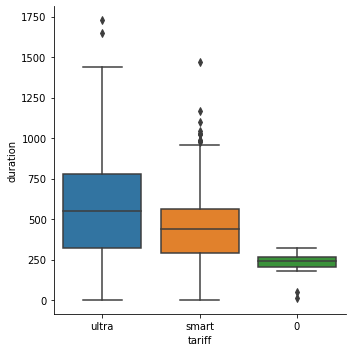

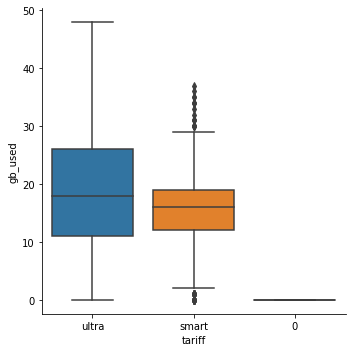

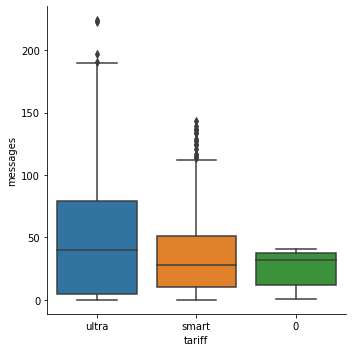

In [32]:
for column in ['duration', 'gb_used', 'messages']:
    sns.catplot(x="tariff", y=column, kind="box", data=user_total)

Построим гистограммы по каждому столбцу, чтобы точнее понять распределение. По длительности звонков и траффику распределение тяготеет к нормальному с выбросами вправо.
Гистограмма столбца 'messages' похожа на распределение Пуассона. Правый выброс подтверждает, что совсем немного пользователей тарифа Ultra -2-3%  могут отправлять 180 сообщений в месяц.

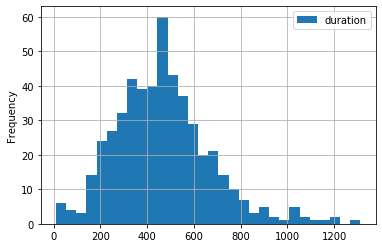

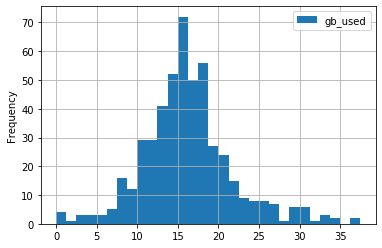

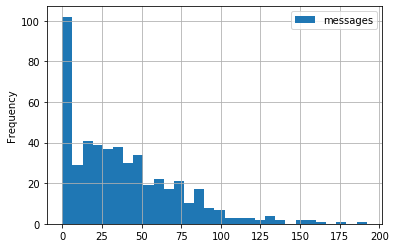

In [33]:
for column in ['duration', 'gb_used', 'messages']:
    user_total_mean.plot(kind='hist', y=column, label=column, bins=30, grid=True, legend=True )

## Шаг 4. Проверьте гипотезы

Поскольку Центральная Предельная Теорема гласит, что "если в выборке достаточно наблюдений, выборочное распределение выборочного среднего из любой генеральной совокупности распределено нормально вокруг среднего этой генеральной совокупности". "Любой" означает, что данная совокупность может быть сгруппирована как угодно - мы сгруппировали две совокупности согласно тарифу и две совокупности согласно городу проживания пользователя. Нам необходимо проверить данные генеральной совокупности по ее случайной выборке. В данном случае сравнить средние значения двух генеральных совокупностей - данные по выручке тарифа ultra  и smart, в первом случае, данные по выручке от пользователей в г.Москва  и выручке от пользователей в других городах, во втором случае.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, нужно понять, нормально ли распределено выборочное вокруг среднего всей генеральной совокупности, значима ли разница между этими средними. Для этого проведем статистический тест с помощью метода scipy.stats.ttest_ind.


#### Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.




Формируем нулевую гипотезу:

H₀ =  "средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".

Из H₀ формулируем альтернативную гипотезу:

H₁ = "средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт". 
Уровень статистической значимости установим 2,5%.
Так как дисперсия больше у тарифа ultra, установим параметр False для equal_var.

Мы отвергаем нулевую гипотезу и предполагаем, что средние выручки различаются по тарифам.

In [34]:
ultra = user_total.query('tariff == "ultra"')['turnover']
smart = user_total.query('tariff == "smart"')['turnover']

alpha = .025
    
results = st.ttest_ind(
    ultra, 
    smart,
    equal_var=False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  1.897e-321
Отвергаем нулевую гипотезу


Проверим наше предположение о различии выручки по тарифам по медианному среднему. Медианы чуть ниже среднего, поэтому график слегка скошен вправо. Но выручка по тарифу Smart остается гораздо меньше тарифа Ultra

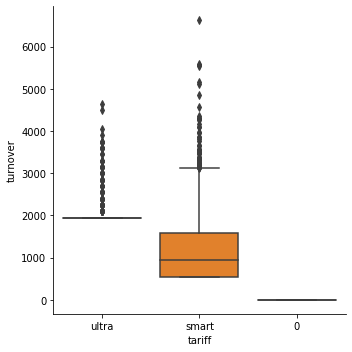

In [35]:
sns.catplot(x="tariff", y="turnover", kind="box", data=user_total)

#### Проверим гипотезу, что средняя выручка от пользователей из Москвы отличается от выручки от пользователей из других регионов

Создадим дополнительный столбец в основном датасете по разделению городов по 1 признаку.  

In [36]:
def other_city (city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'другой город'
    
user_total['other_city'] = user_total['city'].apply(other_city)
user_total.pivot_table(index='other_city', values='turnover', aggfunc='mean').round(2)


,turnover
other_city,
Москва,1479.03
другой город,1437.61


Формируем нулевую гипотезу: 

H₀ = "средняя выручка от пользователей  из Москвы равна выручке от пользователей из других регионов"¶. 

Из H₀ формулируем альтернативную гипотезу:
H₁ = "средняя выручка от пользователей из Москвы не равна средней выручке от пользователей из других регионов. 
Уровень статистической значимости установим 2,5%. 

Согласно результату теста не получилось отвергнуть нулевую гипотезу и предполагаем, что средние выручки не различаются.

In [37]:
moscow = user_total.query('other_city == "Москва"')['turnover']
other_city = user_total.query('other_city == "другой город"')['turnover']

alpha = .025
    
results = st.ttest_ind(
    moscow, 
    other_city,
    equal_var=False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.217036890317824
Не получилось отвергнуть нулевую гипотезу


Диаграммы размаха подтверждают,что не только медианы почти не отличаются от средних данных и очень близки и в Москве, и в других городах, но и межквартильные размахи практически идентичны. Все это говорит о том, что выручка пользователей не зависит от города и практически не различима между Москвой и другими городами.

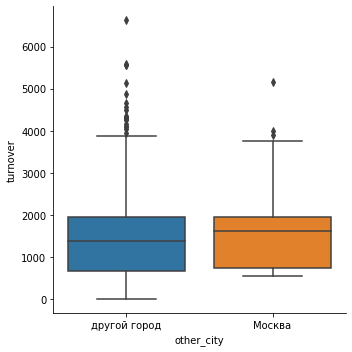

In [38]:
sns.catplot(x="other_city", y="turnover", kind="box", data=user_total)

## Шаг 5. Общий вывод

Мы провели исследование по всем основным параметрам тарифов Smart и Ultra от компании Мегалайн. 
Были рассмотрены средние данные по длительности звонков, количеству сообщений, объему интернет-траффика.
На основании полученных данных можно сделать следующие выводы:
    1. Пользователи тарифа Smart практически не превышают лимит и в среднем расходуют 430 минут, 33 сообщения в месяц. Но им немного не хватает интернет-трафика, при лимите 15 Гб, пользователи тратят 15,37 Гб. При этом они доплачивают почти 646 рублей сверх абонентской платы. Судя по данным - в основном за интернет.
    2. Пользователи тарифа Ultra в среднем не используют весь лимит тарифа, расходуя только 563 минуты из 3000, 49 сообщений из 1000, 19 Гб из 30. Тем не менее, они больше тратят минут, сообщений и Гб, чем пользователи Smart. По тарифу Ultra дисперсия больше и выбросов существенно больше: есть показатели более 1400 минут, 48 Гб, 180 сообщений, есть около 2-3% пользователей, кто реально использует все возможности дорогого тарифа. 
    3. Разница в средней выручке от пользователей различается почти в 2 раза: Smart - 1196 руб, Ultra - 2053 руб. Конечно для компании более доходен дорогой тариф, но почти 70% пользователей пользуются Smart, поэтому обязательно нужно учитывать интересы данных клиентов и мониторить предложения от конкурентов.
    4. По региональному признаку отличий нет, т.к. место жительства пользователя не влияет на размер выручки. И в Москве, и в других городах - средняя выручка с каждого пользователя составляет около 1450 рублей в месяц.

Более оптимальным тарифом является Smart согласно цене и предоставляемым лимитам, но необходимо строго следить за превышением, поскольку стоимость всех услуг сверх тарифного пакета гораздо выше, чем в пакете Ultra.
Если пользователю крайне важен постоянный и полный доступ ко всем телекоммуниционным услугам, то рекомендуется тариф Ultra, где превысить лимит крайне сложно, но необходимо будет за это платить почти в 2 раза больше.
    
   